In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mods import models, ligtools, plotter, prep
from scipy import optimize
import corner
%matplotlib inline
%load_ext autoreload

In [38]:
ligs = np.array([ligtools.dilser() for i in range(6)])
rtot = np.array([0.001,0.0025,0.005,0.01,0.025,0.05])
parm = np.array([3.,2.,0.1,100.]) #k11,k21,k22,l20
datset = np.array([models.wyman_bestfit(parm,ligs[i],rtot[i]) for i in range(len(ligs))])

In [39]:
noisedset = [np.array([np.random.normal(datset,(0.05*datset)) for i in range(3)]) for i in range(3000)]
meanset_list = np.array([noisedset[i].mean(axis=0) for i in range(len(noisedset))])
stdset_list = np.array([noisedset[i].std(axis=0) for i in range(len(noisedset))])

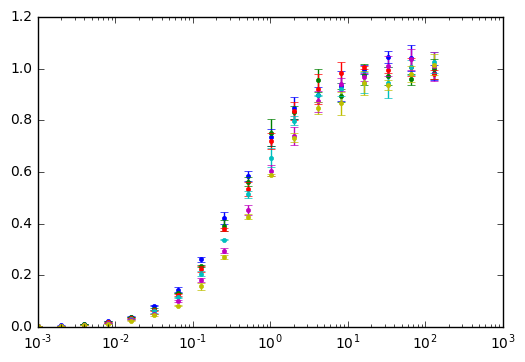

In [40]:
a = plotter.semlogerr(ligs,meanset_list[2],stdset_list[2]) #sanity check - visualize one of the sets

In [41]:
guess = np.array([5.,3.,0.6,100.])

In [42]:
bound1 = ((0.0,0.0,0.0,0.0),(10.0,10.0,10.0,1000.0))

In [43]:
result_test = optimize.least_squares(models.wyman_sp,guess,bounds=bound1,args=(ligs,meanset_list[1],rtot))

ValueError: operands could not be broadcast together with shapes (6,) (6,18) 

In [7]:
fit_set = [optimize.least_squares(models.wyman_sp,parm,bounds=bound1,args=(ligs,meanset_list[i])) for i in range(len(meanset_list))]

SyntaxError: invalid syntax (<ipython-input-7-bd50073670fd>, line 1)

In [11]:
meanset_list[0]

array([[ 0.00267383,  0.00559402,  0.01009265,  0.02061928,  0.04173479,
         0.0804449 ,  0.14350408,  0.25828764,  0.40767997,  0.61105837,
         0.72114485,  0.85938395,  0.90596594,  0.89924494,  0.96244695,
         0.95886148,  0.9735451 ,  0.99932716],
       [ 0.00239209,  0.00486992,  0.01000281,  0.01947867,  0.03827831,
         0.07167378,  0.14049626,  0.24107234,  0.3813308 ,  0.56751478,
         0.72527697,  0.83408004,  0.93317173,  0.95622898,  0.98264568,
         1.02261705,  0.97753931,  1.03237675],
       [ 0.00215827,  0.00418905,  0.00898405,  0.01774062,  0.03378818,
         0.06519805,  0.12988167,  0.23342769,  0.37244869,  0.54825753,
         0.70961537,  0.88048188,  0.92908868,  0.93220894,  0.97013055,
         0.96021521,  1.02827718,  0.97936968],
       [ 0.00183556,  0.00400644,  0.00766686,  0.01592299,  0.03025801,
         0.06245261,  0.11218864,  0.18798685,  0.35239128,  0.50588749,
         0.65254715,  0.81811269,  0.85175737,  1.017

In [21]:
a = np.concatenate(meanset_list[0]) * np.concatenate(ligs)

In [22]:
a.size

108

In [23]:
ligs.size

108

In [37]:
type(meanset_list)

list

In [34]:
ligs

array([[  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
          8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
          6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
          5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
          4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
          3.27680000e+01,   6.55360000e+01,   1.31072000e+02],
       [  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
          8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
          6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
          5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
          4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
          3.27680000e+01,   6.55360000e+01,   1.31072000e+02],
       [  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
          8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
          6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
          5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
      

In [50]:
list(meanset_list[0])

[array([ 0.00262269,  0.00533991,  0.01069883,  0.02247273,  0.04167142,
         0.08232673,  0.14820443,  0.26502363,  0.39430296,  0.59254049,
         0.78037211,  0.83494085,  0.88540166,  0.95722321,  0.92833488,
         1.04476077,  1.02628381,  1.0186471 ]),
 array([ 0.0025315 ,  0.00486989,  0.00971673,  0.01898613,  0.03875885,
         0.07356643,  0.13418673,  0.23973463,  0.38214919,  0.56736587,
         0.73930431,  0.82015238,  0.88245277,  0.89417078,  0.97887608,
         1.03148862,  1.00715519,  1.03284383]),
 array([ 0.00232217,  0.0043623 ,  0.00896173,  0.01684661,  0.03621243,
         0.06743158,  0.1200368 ,  0.22051534,  0.36486005,  0.5396305 ,
         0.69631859,  0.820948  ,  0.92495783,  0.94645121,  0.97772023,
         0.98278089,  0.99061075,  0.98209529]),
 array([ 0.00205803,  0.00401106,  0.00729149,  0.01501868,  0.03044732,
         0.06158734,  0.11270377,  0.20280089,  0.31829976,  0.49138531,
         0.67489352,  0.8060431 ,  0.89563844,  0.

In [51]:
cop = meanset_list[0]

In [56]:
cop.shape

(6, 18)

In [57]:
cop.dtype

dtype('float64')

In [60]:
bop = cop.astype('O')

In [59]:
cop

array([[ 0.00262269,  0.00533991,  0.01069883,  0.02247273,  0.04167142,
         0.08232673,  0.14820443,  0.26502363,  0.39430296,  0.59254049,
         0.78037211,  0.83494085,  0.88540166,  0.95722321,  0.92833488,
         1.04476077,  1.02628381,  1.0186471 ],
       [ 0.0025315 ,  0.00486989,  0.00971673,  0.01898613,  0.03875885,
         0.07356643,  0.13418673,  0.23973463,  0.38214919,  0.56736587,
         0.73930431,  0.82015238,  0.88245277,  0.89417078,  0.97887608,
         1.03148862,  1.00715519,  1.03284383],
       [ 0.00232217,  0.0043623 ,  0.00896173,  0.01684661,  0.03621243,
         0.06743158,  0.1200368 ,  0.22051534,  0.36486005,  0.5396305 ,
         0.69631859,  0.820948  ,  0.92495783,  0.94645121,  0.97772023,
         0.98278089,  0.99061075,  0.98209529],
       [ 0.00205803,  0.00401106,  0.00729149,  0.01501868,  0.03044732,
         0.06158734,  0.11270377,  0.20280089,  0.31829976,  0.49138531,
         0.67489352,  0.8060431 ,  0.89563844,  0.878

(6, 18)

In [65]:
rtot

array([ 0.001 ,  0.0025,  0.005 ,  0.01  ,  0.025 ,  0.05  ])

In [66]:
np.repeat(rtot,3)

array([ 0.001 ,  0.001 ,  0.001 ,  0.0025,  0.0025,  0.0025,  0.005 ,
        0.005 ,  0.005 ,  0.01  ,  0.01  ,  0.01  ,  0.025 ,  0.025 ,
        0.025 ,  0.05  ,  0.05  ,  0.05  ])

In [67]:
np.reshape(rtot,(6,18))

ValueError: total size of new array must be unchanged

In [68]:
np.reshape(meanset_list[0], 6)

ValueError: total size of new array must be unchanged

In [71]:
lop = list(cop)

In [72]:
lop.shape

AttributeError: 'list' object has no attribute 'shape'

array([ 0.00262269,  0.00533991,  0.01069883,  0.02247273,  0.04167142,
        0.08232673,  0.14820443,  0.26502363,  0.39430296,  0.59254049,
        0.78037211,  0.83494085,  0.88540166,  0.95722321,  0.92833488,
        1.04476077,  1.02628381,  1.0186471 ])

In [77]:
np.multiply(meanset_list[0],rtot.T)

ValueError: operands could not be broadcast together with shapes (6,18) (6,) 

In [83]:
rtot.transpose().shape

(6,)

In [84]:
rtot.shape

(6,)

In [85]:
meanset_list[0]

array([[ 0.00262269,  0.00533991,  0.01069883,  0.02247273,  0.04167142,
         0.08232673,  0.14820443,  0.26502363,  0.39430296,  0.59254049,
         0.78037211,  0.83494085,  0.88540166,  0.95722321,  0.92833488,
         1.04476077,  1.02628381,  1.0186471 ],
       [ 0.0025315 ,  0.00486989,  0.00971673,  0.01898613,  0.03875885,
         0.07356643,  0.13418673,  0.23973463,  0.38214919,  0.56736587,
         0.73930431,  0.82015238,  0.88245277,  0.89417078,  0.97887608,
         1.03148862,  1.00715519,  1.03284383],
       [ 0.00232217,  0.0043623 ,  0.00896173,  0.01684661,  0.03621243,
         0.06743158,  0.1200368 ,  0.22051534,  0.36486005,  0.5396305 ,
         0.69631859,  0.820948  ,  0.92495783,  0.94645121,  0.97772023,
         0.98278089,  0.99061075,  0.98209529],
       [ 0.00205803,  0.00401106,  0.00729149,  0.01501868,  0.03044732,
         0.06158734,  0.11270377,  0.20280089,  0.31829976,  0.49138531,
         0.67489352,  0.8060431 ,  0.89563844,  0.878

In [86]:
np.concatenate(meanset_list[0])

array([ 0.00262269,  0.00533991,  0.01069883,  0.02247273,  0.04167142,
        0.08232673,  0.14820443,  0.26502363,  0.39430296,  0.59254049,
        0.78037211,  0.83494085,  0.88540166,  0.95722321,  0.92833488,
        1.04476077,  1.02628381,  1.0186471 ,  0.0025315 ,  0.00486989,
        0.00971673,  0.01898613,  0.03875885,  0.07356643,  0.13418673,
        0.23973463,  0.38214919,  0.56736587,  0.73930431,  0.82015238,
        0.88245277,  0.89417078,  0.97887608,  1.03148862,  1.00715519,
        1.03284383,  0.00232217,  0.0043623 ,  0.00896173,  0.01684661,
        0.03621243,  0.06743158,  0.1200368 ,  0.22051534,  0.36486005,
        0.5396305 ,  0.69631859,  0.820948  ,  0.92495783,  0.94645121,
        0.97772023,  0.98278089,  0.99061075,  0.98209529,  0.00205803,
        0.00401106,  0.00729149,  0.01501868,  0.03044732,  0.06158734,
        0.11270377,  0.20280089,  0.31829976,  0.49138531,  0.67489352,
        0.8060431 ,  0.89563844,  0.87872694,  0.9500544 ,  0.98

In [90]:
np.cross(meanset_list[0],rtot)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [92]:
meanset_list[0][0]

array([ 0.00262269,  0.00533991,  0.01069883,  0.02247273,  0.04167142,
        0.08232673,  0.14820443,  0.26502363,  0.39430296,  0.59254049,
        0.78037211,  0.83494085,  0.88540166,  0.95722321,  0.92833488,
        1.04476077,  1.02628381,  1.0186471 ])

In [94]:
np.multiply(rtot[0],meanset_list[0])

array([[  2.62268914e-06,   5.33990734e-06,   1.06988343e-05,
          2.24727314e-05,   4.16714204e-05,   8.23267312e-05,
          1.48204429e-04,   2.65023627e-04,   3.94302962e-04,
          5.92540491e-04,   7.80372110e-04,   8.34940845e-04,
          8.85401664e-04,   9.57223213e-04,   9.28334883e-04,
          1.04476077e-03,   1.02628381e-03,   1.01864710e-03],
       [  2.53149745e-06,   4.86988554e-06,   9.71673449e-06,
          1.89861297e-05,   3.87588516e-05,   7.35664317e-05,
          1.34186726e-04,   2.39734625e-04,   3.82149189e-04,
          5.67365867e-04,   7.39304314e-04,   8.20152385e-04,
          8.82452768e-04,   8.94170777e-04,   9.78876084e-04,
          1.03148862e-03,   1.00715519e-03,   1.03284383e-03],
       [  2.32217073e-06,   4.36230257e-06,   8.96172577e-06,
          1.68466073e-05,   3.62124266e-05,   6.74315837e-05,
          1.20036799e-04,   2.20515344e-04,   3.64860051e-04,
          5.39630504e-04,   6.96318589e-04,   8.20948004e-04,
      

In [95]:
rtot[0]

0.001

In [97]:
rtot[0]*meanset_list[0][]

array([  2.53149745e-06,   4.86988554e-06,   9.71673449e-06,
         1.89861297e-05,   3.87588516e-05,   7.35664317e-05,
         1.34186726e-04,   2.39734625e-04,   3.82149189e-04,
         5.67365867e-04,   7.39304314e-04,   8.20152385e-04,
         8.82452768e-04,   8.94170777e-04,   9.78876084e-04,
         1.03148862e-03,   1.00715519e-03,   1.03284383e-03])

In [100]:
meanset_list[0]*rtot[:,np.newaxis]

array([[  2.62268914e-06,   5.33990734e-06,   1.06988343e-05,
          2.24727314e-05,   4.16714204e-05,   8.23267312e-05,
          1.48204429e-04,   2.65023627e-04,   3.94302962e-04,
          5.92540491e-04,   7.80372110e-04,   8.34940845e-04,
          8.85401664e-04,   9.57223213e-04,   9.28334883e-04,
          1.04476077e-03,   1.02628381e-03,   1.01864710e-03],
       [  6.32874363e-06,   1.21747138e-05,   2.42918362e-05,
          4.74653244e-05,   9.68971291e-05,   1.83916079e-04,
          3.35466814e-04,   5.99336564e-04,   9.55372972e-04,
          1.41841467e-03,   1.84826079e-03,   2.05038096e-03,
          2.20613192e-03,   2.23542694e-03,   2.44719021e-03,
          2.57872155e-03,   2.51788799e-03,   2.58210957e-03],
       [  1.16108536e-05,   2.18115129e-05,   4.48086289e-05,
          8.42330364e-05,   1.81062133e-04,   3.37157919e-04,
          6.00183993e-04,   1.10257672e-03,   1.82430025e-03,
          2.69815252e-03,   3.48159294e-03,   4.10474002e-03,
      

In [101]:
%autoreload

In [102]:
result_test = optimize.least_squares(models.wyman_sp_rect,guess,bounds=bound1,args=(ligs,meanset_list[1],rtot))

In [103]:
result_test.x

array([  3.07697820e+00,   2.09156031e+00,   1.18851465e-01,
         1.21369039e+02])

In [104]:
parm

array([   3. ,    2. ,    0.1,  100. ])